In [0]:
import pandas as pd
import numpy as np
import cv2
width, height = 48, 48

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import drive


In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = 'gdrive/My Drive/Colab Notebooks/'

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1r3yWep0Y1SBa5euootMWJpukEucVJdDg'


In [10]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1r3yWep0Y1SBa5euootMWJpukEucVJdDg


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('fer2013.csv')  
data = pd.read_csv('fer2013.csv')

In [0]:
pixels = data['pixels'].tolist()
faces = []

for pixel_sequence in pixels:
  face = [int(pixel) for pixel in pixel_sequence.split(' ')]
  face = np.asarray(face).reshape(width, height)
  # face = face / 255.0
  face = cv2.resize(face.astype('uint8'), (width, height))
  faces.append(face.astype('float32'))

faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)

np.save('faces_array.npy', faces) 

In [0]:
MODELPATH = '/models/model.h5'

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [17]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 100
width, height = 48, 48
MODELPATH = 'models/model.h5'
data = pd.read_csv('fer2013.csv')
faces = np.load('faces_array.npy')
emotions = pd.get_dummies(data['emotion']).as_matrix()
X_train, X_test, y_train, y_test = train_test_split(faces, emotions, test_size=0.1, random_state=42)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=41)
model = Sequential()

model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1),
data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))


In [0]:
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_8 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_9 (Batch (None, 23, 23, 128)      

In [0]:
model.compile(loss=categorical_crossentropy, optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), metrics=['accuracy'])

In [0]:
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)
tensorboard = TensorBoard(log_dir='./logs')
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(MODELPATH, monitor='val_loss', verbose=1, save_best_only=True)

In [0]:
model.fit(np.array(X_train), np.array(y_train),
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_data=(np.array(X_test), np.array(y_test)),
 shuffle=True,
 callbacks=[lr_reducer, tensorboard, early_stopper, checkpointer])

Train on 29068 samples, validate on 3589 samples
Epoch 1/100
29068/29068 [==============================] - 59s 2ms/step - loss: 2.0343 - acc: 0.2107 - val_loss: 1.8337 - val_acc: 0.2455

Epoch 00001: val_loss improved from inf to 1.83369, saving model to models/model.h5
Epoch 2/100
29068/29068 [==============================] - 57s 2ms/step - loss: 1.8408 - acc: 0.2435 - val_loss: 1.8267 - val_acc: 0.2455

Epoch 00002: val_loss improved from 1.83369 to 1.82669, saving model to models/model.h5
Epoch 3/100
29068/29068 [==============================] - 57s 2ms/step - loss: 1.8166 - acc: 0.2530 - val_loss: 1.7998 - val_acc: 0.2508

Epoch 00003: val_loss improved from 1.82669 to 1.79977, saving model to models/model.h5
Epoch 4/100
29068/29068 [==============================] - 58s 2ms/step - loss: 1.7573 - acc: 0.2852 - val_loss: 1.8479 - val_acc: 0.2505

Epoch 00004: val_loss did not improve from 1.79977
Epoch 5/100
29068/29068 [==============================] - 58s 2ms/step - loss: 1.64

In [0]:
scores = model.evaluate(np.array(X_test), np.array(y_test), batch_size=batch_size)
print("Loss: " + str(scores[0]))
print("Accuracy: " + str(scores[1]))

3589/3589 [==============================] - 2s 611us/step
Loss: 1.0678984275200334
Accuracy: 0.6422401783558678


In [0]:
model.save('my_model.h5')

#from google.colab import files
#files.download('/models/model.h5')

In [0]:
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1)

In [0]:
from google.colab import files
files.download('my_model.h5')

In [21]:
%%javascript
const listenerChannel = new BroadcastChannel('channel');
listenerChannel.onmessage = (msg) => {
  const div = document.createElement('div');
  div.textContent = msg.data;
  document.body.appendChild(div);
};

<IPython.core.display.Javascript object>

In [22]:
%%javascript
const senderChannel = new BroadcastChannel('channel');
senderChannel.postMessage('Hello world!');

<IPython.core.display.Javascript object>

In [0]:

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='angry.png', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to angry.png


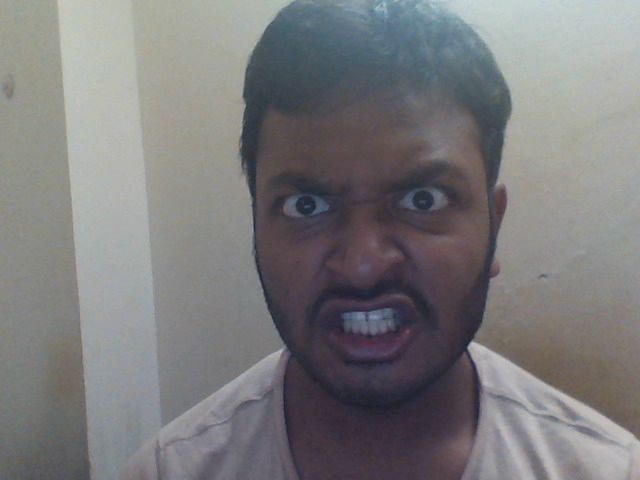

In [89]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
!cp "/content/drive/My Drive/Colab_minor/model.h5" "model.h5"

In [51]:
!wget http://alereimondo.no-ip.org/OpenCV/uploads/34/frontalFace10.zip
!unzip  frontalFace10.zip

--2019-10-16 00:22:33--  http://alereimondo.no-ip.org/OpenCV/uploads/34/frontalFace10.zip
Resolving alereimondo.no-ip.org (alereimondo.no-ip.org)... 181.167.179.145
Connecting to alereimondo.no-ip.org (alereimondo.no-ip.org)|181.167.179.145|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 763850 (746K) [application/zip]
Saving to: ‘frontalFace10.zip’

frontalFace10.zip   100%[===================>] 745.95K   138KB/s    in 5.4s    

2019-10-16 00:22:39 (138 KB/s) - ‘frontalFace10.zip’ saved [763850/763850]

Archive:  frontalFace10.zip
  inflating: haarcascade_frontalface_alt_tree.xml  
  inflating: haarcascade_frontalface_alt.xml  
  inflating: haarcascade_frontalface_alt2.xml  
  inflating: haarcascade_frontalface_default.xml  


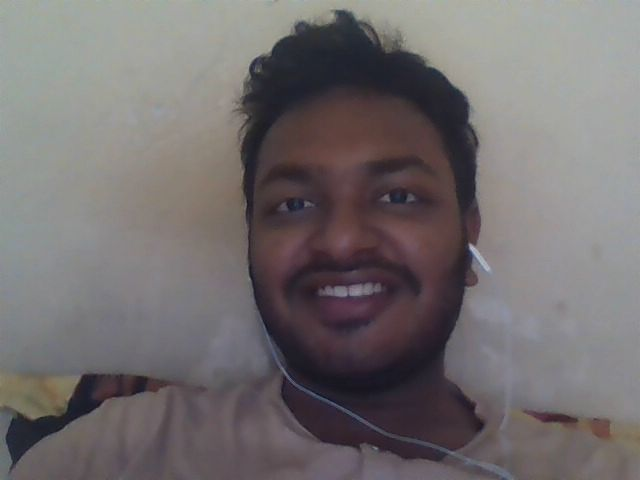

Happy


In [63]:
import cv2
from keras.models import load_model
from google.colab.patches import cv2_imshow
img = cv2.imread('photo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
MODELPATH = 'model.h5'
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}
model = load_model(MODELPATH)
expression = "Neutral"

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  
for (x, y, w, h) in faces:
  cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)
  roi_gray = gray[y:y + h, x:x + w]
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
  cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
  prediction = model.predict(cropped_img)
  expression = emotion_dict[int(np.argmax(prediction))]
  cv2.putText(img, emotion_dict[int(np.argmax(prediction))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)
    
print(expression)

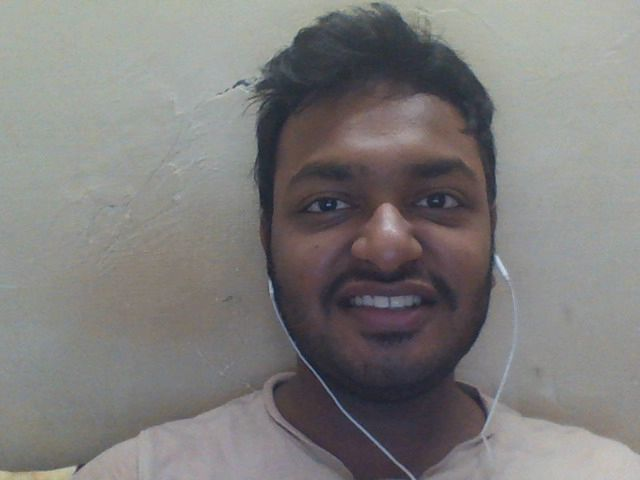

Happy


In [68]:
import cv2
from keras.models import load_model
from google.colab.patches import cv2_imshow
img = cv2.imread('happy.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
MODELPATH = 'model.h5'
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}
model = load_model(MODELPATH)
expression = "Neutral"

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  
for (x, y, w, h) in faces:
  cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)
  roi_gray = gray[y:y + h, x:x + w]
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
  cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
  prediction = model.predict(cropped_img)
  expression = emotion_dict[int(np.argmax(prediction))]
  cv2.putText(img, emotion_dict[int(np.argmax(prediction))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)
    
print(expression)

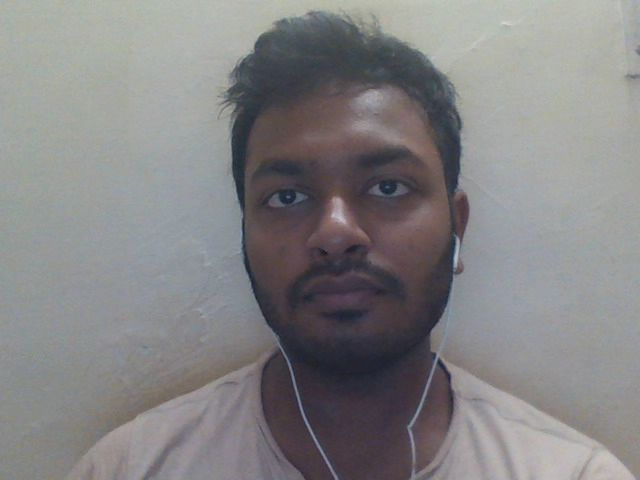

Neutral


In [73]:
import cv2
from keras.models import load_model
from google.colab.patches import cv2_imshow
img = cv2.imread('neutral.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
MODELPATH = 'model.h5'
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}
model = load_model(MODELPATH)
expression = "Neutral"

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  
for (x, y, w, h) in faces:
  cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)
  roi_gray = gray[y:y + h, x:x + w]
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
  cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
  prediction = model.predict(cropped_img)
  expression = emotion_dict[int(np.argmax(prediction))]
  cv2.putText(img, emotion_dict[int(np.argmax(prediction))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)
    
print(expression)

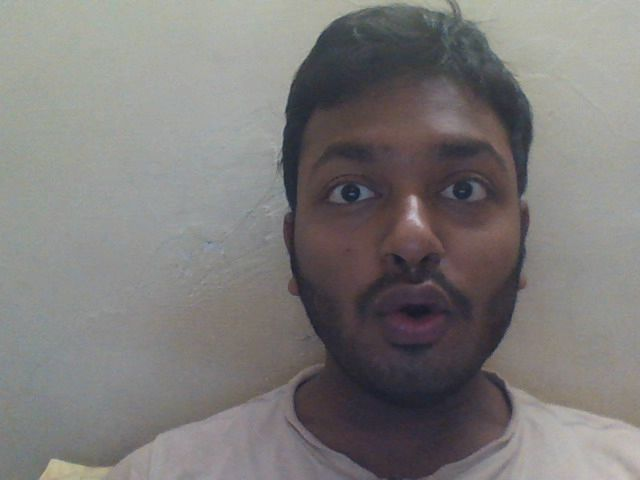

Neutral


In [87]:
import cv2
from keras.models import load_model
from google.colab.patches import cv2_imshow
img = cv2.imread('surprise.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
MODELPATH = 'model.h5'
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}
model = load_model(MODELPATH)
expression = "Neutral"

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  
for (x, y, w, h) in faces:
  cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)
  roi_gray = gray[y:y + h, x:x + w]
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
  cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
  prediction = model.predict(cropped_img)
  expression = emotion_dict[int(np.argmax(prediction))]
  cv2.putText(img, emotion_dict[int(np.argmax(prediction))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)
    
print(expression)

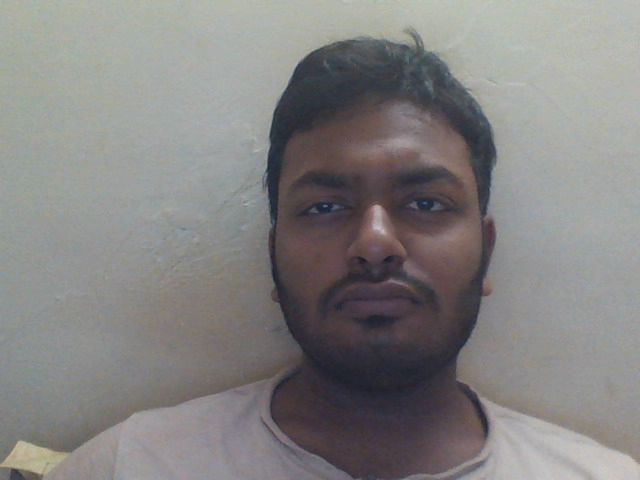

Neutral


In [86]:
import cv2
from keras.models import load_model
from google.colab.patches import cv2_imshow
img = cv2.imread('sad.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
MODELPATH = 'model.h5'
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}
model = load_model(MODELPATH)
expression = "Neutral"

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  
for (x, y, w, h) in faces:
  cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)
  roi_gray = gray[y:y + h, x:x + w]
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
  cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
  prediction = model.predict(cropped_img)
  expression = emotion_dict[int(np.argmax(prediction))]
  cv2.putText(img, emotion_dict[int(np.argmax(prediction))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)
    
print(expression)

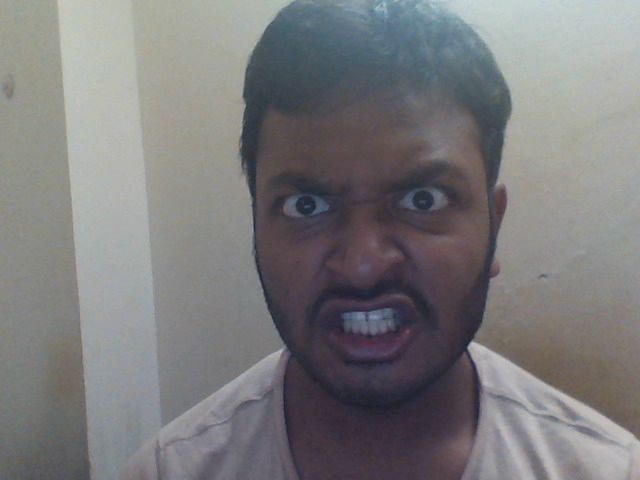

Angry


In [90]:
import cv2
from keras.models import load_model
from google.colab.patches import cv2_imshow
img = cv2.imread('angry.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
MODELPATH = 'model.h5'
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}
model = load_model(MODELPATH)
expression = "Neutral"

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  
for (x, y, w, h) in faces:
  cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)
  roi_gray = gray[y:y + h, x:x + w]
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
  cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
  prediction = model.predict(cropped_img)
  expression = emotion_dict[int(np.argmax(prediction))]
  cv2.putText(img, emotion_dict[int(np.argmax(prediction))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)
    
print(expression)